<a href="https://colab.research.google.com/github/imabari/rakuten_tools/blob/main/%E6%A5%BD%E5%A4%A9%E3%83%A2%E3%83%90%E3%82%A4%E3%83%AB%E7%9F%AD%E6%9C%9F%E3%83%A1%E3%83%B3%E3%83%86%E3%83%8A%E3%83%B3%E3%82%B9%E9%95%B7%E9%87%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.e-stat.go.jp/help/data-definition-information/downloaddata/A002005212015.pdf

In [1]:
!wget "https://www.e-stat.go.jp/gis/statmap-search/data?dlserveyId=A002005212015&code=20&coordSys=1&format=shape&downloadType=5&datum=2000" -O nagano.zip

--2022-06-21 08:36:45--  https://www.e-stat.go.jp/gis/statmap-search/data?dlserveyId=A002005212015&code=20&coordSys=1&format=shape&downloadType=5&datum=2000
Resolving www.e-stat.go.jp (www.e-stat.go.jp)... 111.108.189.107, 2001:268:83a:ff::9
Connecting to www.e-stat.go.jp (www.e-stat.go.jp)|111.108.189.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘nagano.zip’

nagano.zip              [   <=>              ]   7.02M  1022KB/s    in 7.6s    

2022-06-21 08:36:54 (940 KB/s) - ‘nagano.zip’ saved [7357141]



In [2]:
!pip install geopandas
!pip install rtree
!pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.9 MB/s 
     |████████████████████████████████| 16.7 MB 178 kB/s 
     |████████████████████████████████| 6.3 MB 14.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.6 MB/s 


In [3]:
import pandas as pd
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
# 解像度
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 200

In [5]:
# 変換に時間がかかるのでスプレッドシートから
df0 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRt3NMnGCVk4S49Frjrv7ACDvev1sFY06z7r9f6gdV-ZRxaAPHY20U5XFDqe44uCQGFAL0P9cSQUDMm/pub?gid=315632542&single=true&output=csv")
df0

,都道府県,短期メンテナンス工事,作業開始時間,作業終了時間,お客様への影響,対象地域,lon,lat
0,北海道,更新日,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,北海道小樽市春香町の一部地域,141.104081,43.136972
1,北海道,2022/6/14,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,北海道北見市端野町三区の一部地域,143.921302,43.850463
2,北海道,NaN,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,北海道北見市卸町の一部地域,143.836929,43.804932
3,北海道,NaN,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,北海道北見市相内町の一部地域,143.756101,43.797478
4,北海道,NaN,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,北海道北見市端野町二区の一部地域,143.934507,43.874477
...,...,...,...,...,...,...,...,...
545,富山,NaN,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,富山県富山市呉羽町字藤塚の一部地域,137.169750,36.714407
546,富山,NaN,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,富山県富山市中老田の一部地域,137.130368,36.703868
547,富山,NaN,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,富山県富山市平岡の一部地域,137.127669,36.671700
548,富山,NaN,2022年6月17日 1:00,2022年6月17日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,富山県射水市西高木の一部地域,137.123593,36.742316


In [6]:
df1 = df0[df0["都道府県"] == "長野"].copy().reset_index(drop=True)

In [7]:
df1["住所"] = df1["対象地域"].str.replace("の一部地域", "")

In [8]:
df1

,都道府県,短期メンテナンス工事,作業開始時間,作業終了時間,お客様への影響,対象地域,lon,lat,住所
0,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字和田字東沖の一部地域,137.917339,36.205911,長野県松本市大字和田字東沖
1,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字新村字道端の一部地域,137.910208,36.223083,長野県松本市大字新村字道端
2,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字神林字南水寺の一部地域,137.924668,36.190806,長野県松本市大字神林字南水寺
3,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字島内字寺村の一部地域,137.940990,36.260954,長野県松本市大字島内字寺村
4,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字和田字下野尻の一部地域,137.917339,36.205911,長野県松本市大字和田字下野尻
...,...,...,...,...,...,...,...,...,...
198,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市甲字中原前の一部地域,138.405259,36.260328,長野県佐久市甲字中原前
199,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市瀬戸字橋詰の一部地域,138.489097,36.245253,長野県佐久市瀬戸字橋詰
200,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市三塚字北井戸の一部地域,138.451064,36.230235,長野県佐久市三塚字北井戸
201,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市新子田字柳反りの一部地域,138.495061,36.260530,長野県佐久市新子田字柳反り


In [9]:
pt_df = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.lon, df1.lat), crs=4612)

In [10]:
nagano = gpd.read_file("nagano.zip")

In [11]:
nagano.columns

Index(['KEY_CODE', 'PREF', 'CITY', 'S_AREA', 'PREF_NAME', 'CITY_NAME',
       'S_NAME', 'KIGO_E', 'HCODE', 'AREA', 'PERIMETER', 'H27KAxx_',
       'H27KAxx_ID', 'KEN', 'KEN_NAME', 'SITYO_NAME', 'GST_NAME', 'CSS_NAME',
       'KIHON1', 'DUMMY1', 'KIHON2', 'KEYCODE1', 'KEYCODE2', 'AREA_MAX_F',
       'KIGO_D', 'N_KEN', 'N_CITY', 'KIGO_I', 'MOJI', 'KBSUM', 'JINKO',
       'SETAI', 'X_CODE', 'Y_CODE', 'KCODE1', 'geometry'],
      dtype='object')

In [12]:
nagano["KEYCODE1"].unique()

array(['201001000', '201002000', '201003001', ..., '602003001',
       '602003002', '602003003'], dtype=object)

In [13]:
nagano.duplicated(subset="KEYCODE1").sum()

106

In [14]:
# 結合
continents = nagano.dissolve(by="KEYCODE1").reset_index()

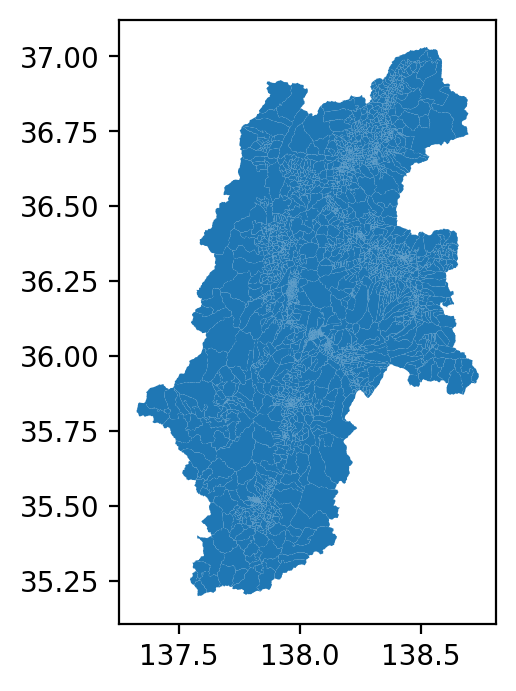

In [15]:
continents.plot()

In [16]:
# geometryから市町村名を取得
spj = gpd.sjoin(pt_df, continents)
spj

,都道府県,短期メンテナンス工事,作業開始時間,作業終了時間,お客様への影響,対象地域,lon,lat,住所,geometry,...,N_KEN,N_CITY,KIGO_I,MOJI,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1
0,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字和田字東沖の一部地域,137.917339,36.205911,長野県松本市大字和田字東沖,POINT (137.91734 36.20591),...,None,None,None,大字和田,36,3999,1178,137.90704,36.19654,0840-00
4,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字和田字下野尻の一部地域,137.917339,36.205911,長野県松本市大字和田字下野尻,POINT (137.91734 36.20591),...,None,None,None,大字和田,36,3999,1178,137.90704,36.19654,0840-00
1,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字新村字道端の一部地域,137.910208,36.223083,長野県松本市大字新村字道端,POINT (137.91021 36.22308),...,None,None,None,大字新村,32,3374,1265,137.90966,36.22278,0820-00
2,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字神林字南水寺の一部地域,137.924668,36.190806,長野県松本市大字神林字南水寺,POINT (137.92467 36.19081),...,None,None,None,大字神林,42,4742,1673,137.92467,36.19084,0740-00
3,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県松本市大字島内字寺村の一部地域,137.940990,36.260954,長野県松本市大字島内字寺村,POINT (137.94099 36.26095),...,None,None,None,大字島内,106,12228,4652,137.94082,36.26064,0790-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市甲字中原前の一部地域,138.405259,36.260328,長野県佐久市甲字中原前,POINT (138.40526 36.26033),...,None,None,None,甲上原,9,536,209,138.39979,36.25104,0580-03
199,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市瀬戸字橋詰の一部地域,138.489097,36.245253,長野県佐久市瀬戸字橋詰,POINT (138.48910 36.24525),...,None,None,None,瀬戸,21,1834,674,138.48999,36.24476,0320-00
200,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市三塚字北井戸の一部地域,138.451064,36.230235,長野県佐久市三塚字北井戸,POINT (138.45106 36.23024),...,None,None,None,三塚,8,747,307,138.45118,36.22955,0230-00
201,長野,NaN,2022年6月16日 1:00,2022年6月16日 5:00,作業時間内で30分未満の通信断が発生し、音声通話およびデータ通信が、ご利用いただけない場合が...,長野県佐久市新子田字柳反りの一部地域,138.495061,36.260530,長野県佐久市新子田字柳反り,POINT (138.49506 36.26053),...,None,None,None,新子田,30,3221,1193,138.50290,36.25964,0390-00


In [17]:
spj.columns

Index(['都道府県', '短期メンテナンス工事', '作業開始時間', '作業終了時間', 'お客様への影響', '対象地域', 'lon',
       'lat', '住所', 'geometry', 'index_right', 'KEYCODE1', 'KEY_CODE', 'PREF',
       'CITY', 'S_AREA', 'PREF_NAME', 'CITY_NAME', 'S_NAME', 'KIGO_E', 'HCODE',
       'AREA', 'PERIMETER', 'H27KAxx_', 'H27KAxx_ID', 'KEN', 'KEN_NAME',
       'SITYO_NAME', 'GST_NAME', 'CSS_NAME', 'KIHON1', 'DUMMY1', 'KIHON2',
       'KEYCODE2', 'AREA_MAX_F', 'KIGO_D', 'N_KEN', 'N_CITY', 'KIGO_I', 'MOJI',
       'KBSUM', 'JINKO', 'SETAI', 'X_CODE', 'Y_CODE', 'KCODE1'],
      dtype='object')

In [18]:
area = continents[continents["KEYCODE1"].isin(spj["KEYCODE1"].unique())].copy()

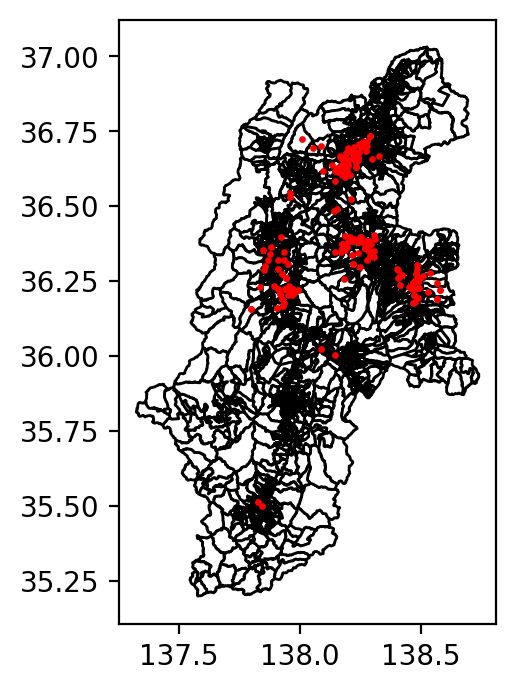

In [19]:
base = continents.plot(color="white", edgecolor="black")
spj.plot(ax=base, marker="o", color="red", markersize=2)

# 地図

In [20]:
import folium
from folium import plugins

In [21]:
m = folium.Map(
    location=[36.65139, 138.18111],
    tiles="https://cyberjapandata.gsi.go.jp/xyz/blank/{z}/{x}/{y}.png",
    attr="国土地理院 白地図",
    zoom_start=9,
)

In [22]:
# エリア
folium.Choropleth(
    geo_data=area,
    fill_color='YlGn', # 塗りつぶしの色
    fill_opacity=0.1, # 塗りつぶしの濃さ
    line_opacity=0.9, # 境界の色の濃さ
).add_to(m)

In [23]:
# マーカー
for i, r in spj.iterrows():

    folium.Marker(
        location=[r.lat, r.lon],
        icon=plugins.BeautifyIcon(icon_shape="circle-dot", border_width=5, border_color="red"),
    ).add_to(m)

In [24]:
m.save(outfile="map.html")